# Decision Trees and Random Forest


## Exercise: Decision Trees

We are going to use the breast cancer dataset from sklearn where the goal is to classify each sample as malignant or benign (binary classification task) based on features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  


### Load the libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline
np.random.seed(1)

<Figure size 6000x6000 with 0 Axes>

### Load the data

In [34]:
# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target names: {cancer.target_names}")

Data shape: (569, 30)
Target shape: (569,)
Target names: ['malignant' 'benign']


### 1. Model fitting

In this exercise you need to do the following:
- Split the data into a training and a test set using test size of 30% of the training set.

- Train a decision tree classifier to the data and visualize it.

- Make a prediction for the test set

- Evaluate the model's performance by computing the accuracy score and plotting the confusion matrix. 

#### Hints: 
Decision Trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Tree Plot: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Confusion matrix plot: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay


The test accuracy is: 0.93


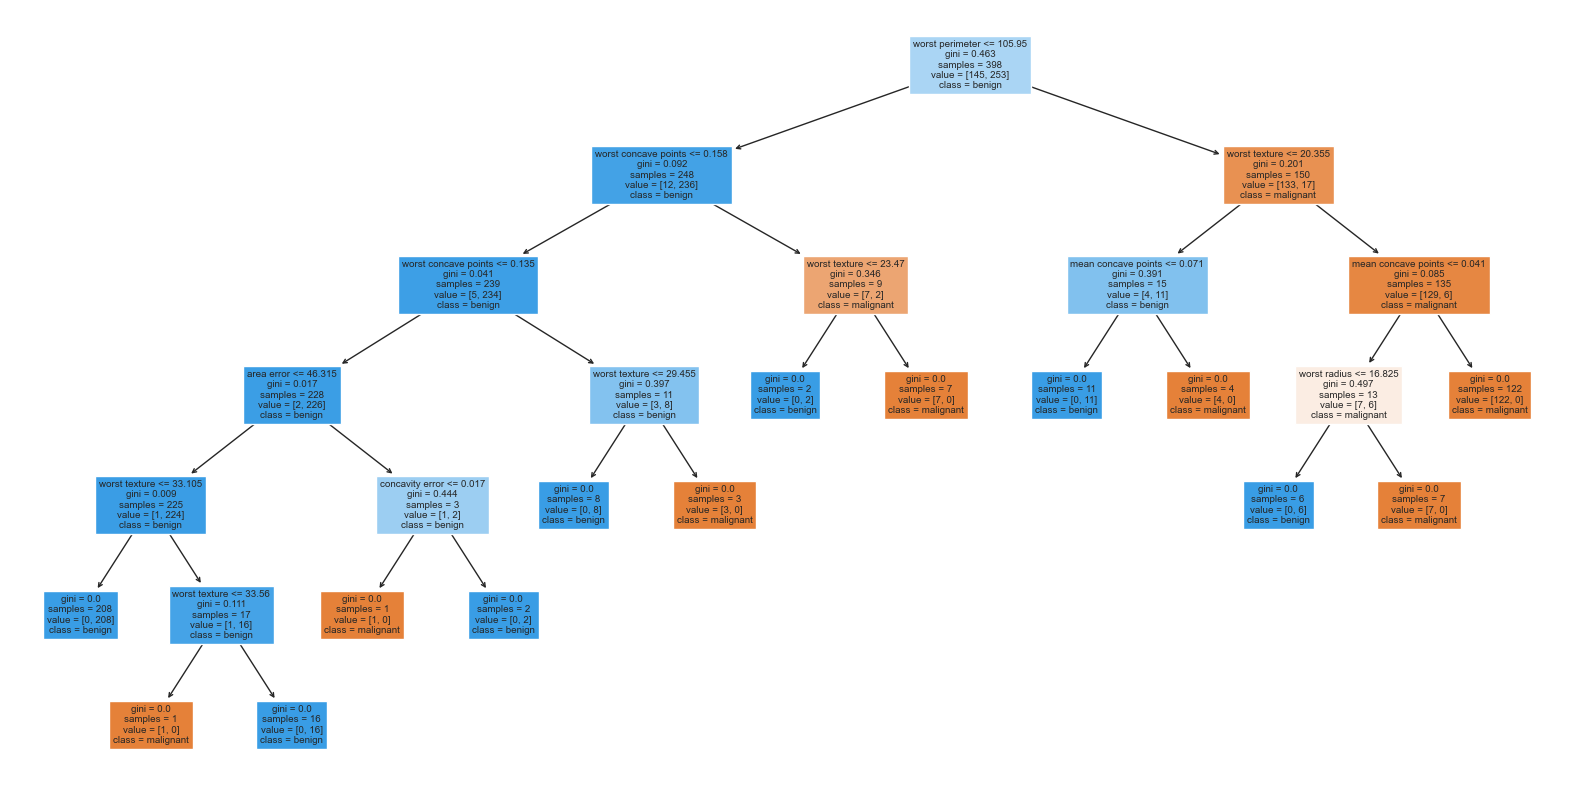

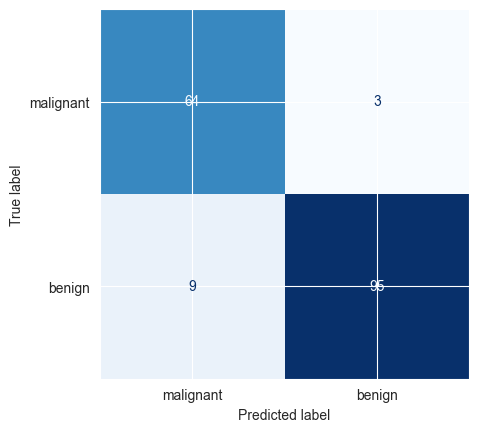

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=2)

# fit model 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
# Plot the fitted tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
# compute predictions for test set
pred_Y = decision_tree.predict(test_X)
# Compute the accuracy score
accuracy = accuracy_score(test_Y, pred_Y)
print(f"The test accuracy is: {accuracy:.2f}")
# Compute the confusion matrix
cm = confusion_matrix(test_Y, pred_Y)
# Plot the confusion matrix
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(colorbar=False, cmap='Blues')

### Tuning tree depth with grid search CV
Tune the tree depth parameter using grid seacrh cross validation. Check out depth values between 1 and 10. 
- What is the optimal tree depth and its corresponding test accuracy score?

- Plot the tree with the optimal depth parameter.

- What is the CV accuracy for the best parameter (tree depth)?

The best performance: 0.9699050632911392
 is delivered by Hyperparameters: DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}


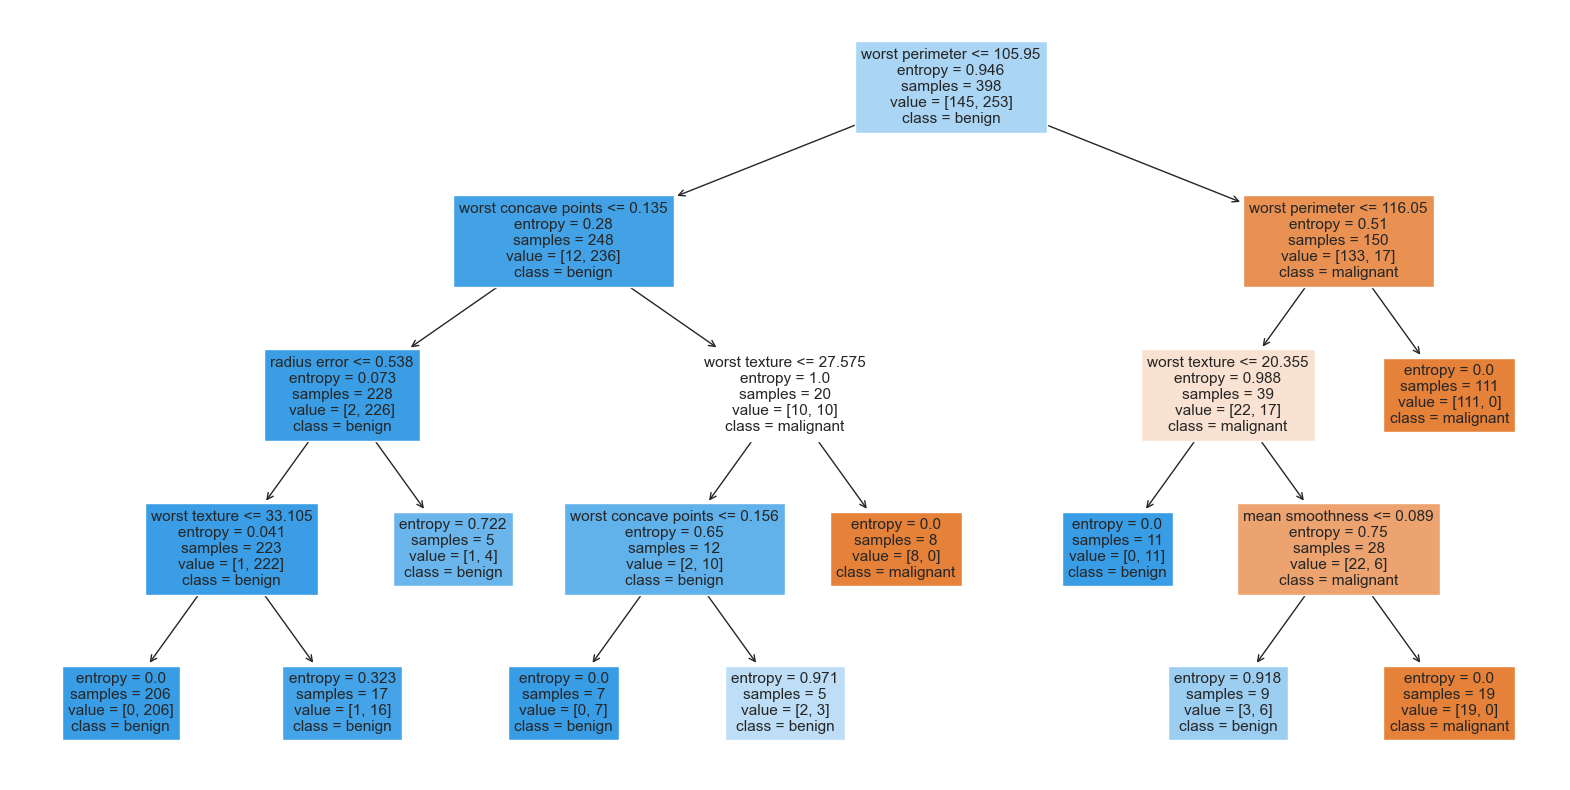

In [56]:
# Grid Search - tuning tree depth
from sklearn.model_selection import GridSearchCV

#### START YOUR SOLUTION HERE ####
param_grid = {'max_depth': range(1, 10),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 10)
              }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, return_train_score=True)

# Define and fit model using grid search CV with 5-fold cross validation
grid_search.fit(train_X, train_Y)
# Plot the fitted tree
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)

print(f"The best train performance: {grid_search.best_score_}")
print(f"for a DecisionTree is delivered by Hyperparameters: {grid_search.best_params_}")

## Exercise: Random Forest
Now we train a random forest model to the same dataset (for the same task) using the same training test split.
- Apply a random forest classifier with 100 trees to the data.
- Compute and print the training and test accuracies and compare it to the out of bag score (hint: set `oob_score = True` in classifier).

#### Hints:
Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

OOB: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html


Test accuracy: 0.96


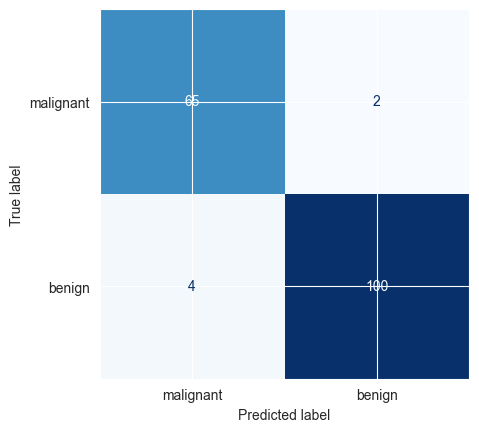

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# fit model 
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_model.fit(train_X, train_Y)

# compute predictions for the training and test sets
test_pred = rf_model.predict(test_X)
# compute the accuracy scores (test, training and OOB)
acc = accuracy_score(test_Y, test_pred)

# print the computed scores
print(f"Test accuracy: {acc:.2f}")

# Compute the confusion matrix
cm = confusion_matrix(test_Y, test_pred)
ConfusionMatrixDisplay(cm, display_labels=cancer.target_names).plot(colorbar=False, cmap='Blues')

### Tune the number of trees parameter using grid search

Use grid search CV (5 folds) to find the best number of treees (estimators) using a grid from 100 to 1000 with a step of 100. Print the best number of trees and its corresponding test accuracy score and cross validation accuracy score.

In [63]:
#### START YOUR SOLUTION HERE ####
# Define the grid for the number of trees
param_grid = {'n_estimators': range(100, 1000, 100),
              'max_depth': range(1, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_split': range(2, 6),
              'min_samples_leaf': range(1, 5)
              }
# Do a grid search to find the optimal number of trees
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, return_train_score=True,n_jobs=7)
grid_search.fit(train_X, train_Y)

# print the best hyperparameter
print(f"The train performance: {grid_search.best_score_}")
print(f"for a RandomForest is delivered by Hyperparameters: {grid_search.best_params_}")

The train performance: 0.9647151898734176
for a RandomForest is delivered by Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Importance plot
Use the permutation importance to compute the feature importances for the best model from the grid search CV. 

#### Hints:
Forest importances: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


<Axes: >

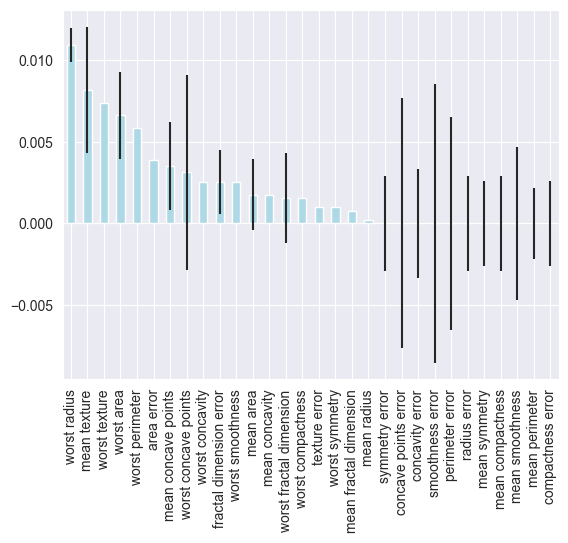

In [65]:
# retrieve the relative importance of each variable and visualize the importance plot
from sklearn.inspection import permutation_importance

#### START YOUR SOLUTION HERE ####
# get the best model from the grid search CV
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(train_X, train_Y)
# compute the feature importances using permutation test
importance = permutation_importance(best_rf_model, test_X, test_Y, n_repeats=30, random_state=0, n_jobs=7)
# sort them


forest_importances = pd.Series(importance.importances_mean, index=cancer.feature_names)
forest_importances.sort_values(inplace=True, ascending=False)
# plot the importances
forest_importances.plot.bar(yerr=importance.importances_std, color='lightblue')

Below we use the attribute `feature_importances_` of random forest model selected in the grid search that quantifies the feature importance based on mean decrease in impurity. These scores, however, can be misleading for continuous and high cardinality features. 

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_2684/2061618953.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forest_importances[sort_index].plot.bar(yerr=std[sort_index], ax=ax)


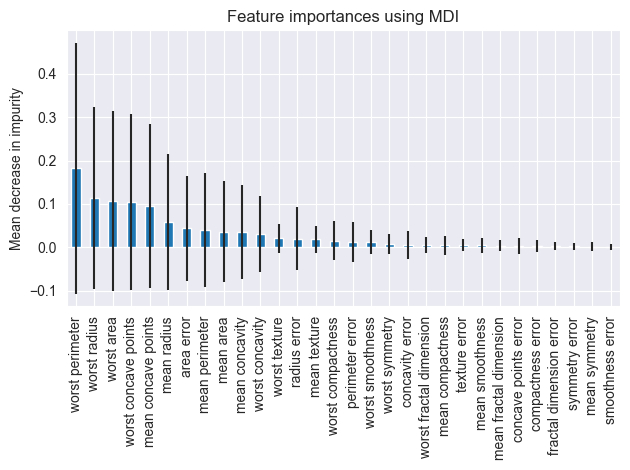

In [66]:
# get the feature importances from the fitted model
importances = best_rf_model.feature_importances_
# get the standard deviations
std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
# put them in a Series
forest_importances = pd.Series(importances, index=cancer.feature_names)
# sort the importances (get the indices of the sorted array to be able to apply it on the errors)
sort_index = np.argsort(forest_importances)[::-1]

# plot them
fig, ax = plt.subplots()
forest_importances[sort_index].plot.bar(yerr=std[sort_index], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()